In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plot_utils import grid_plot
from matplotlib.colors import ListedColormap

import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

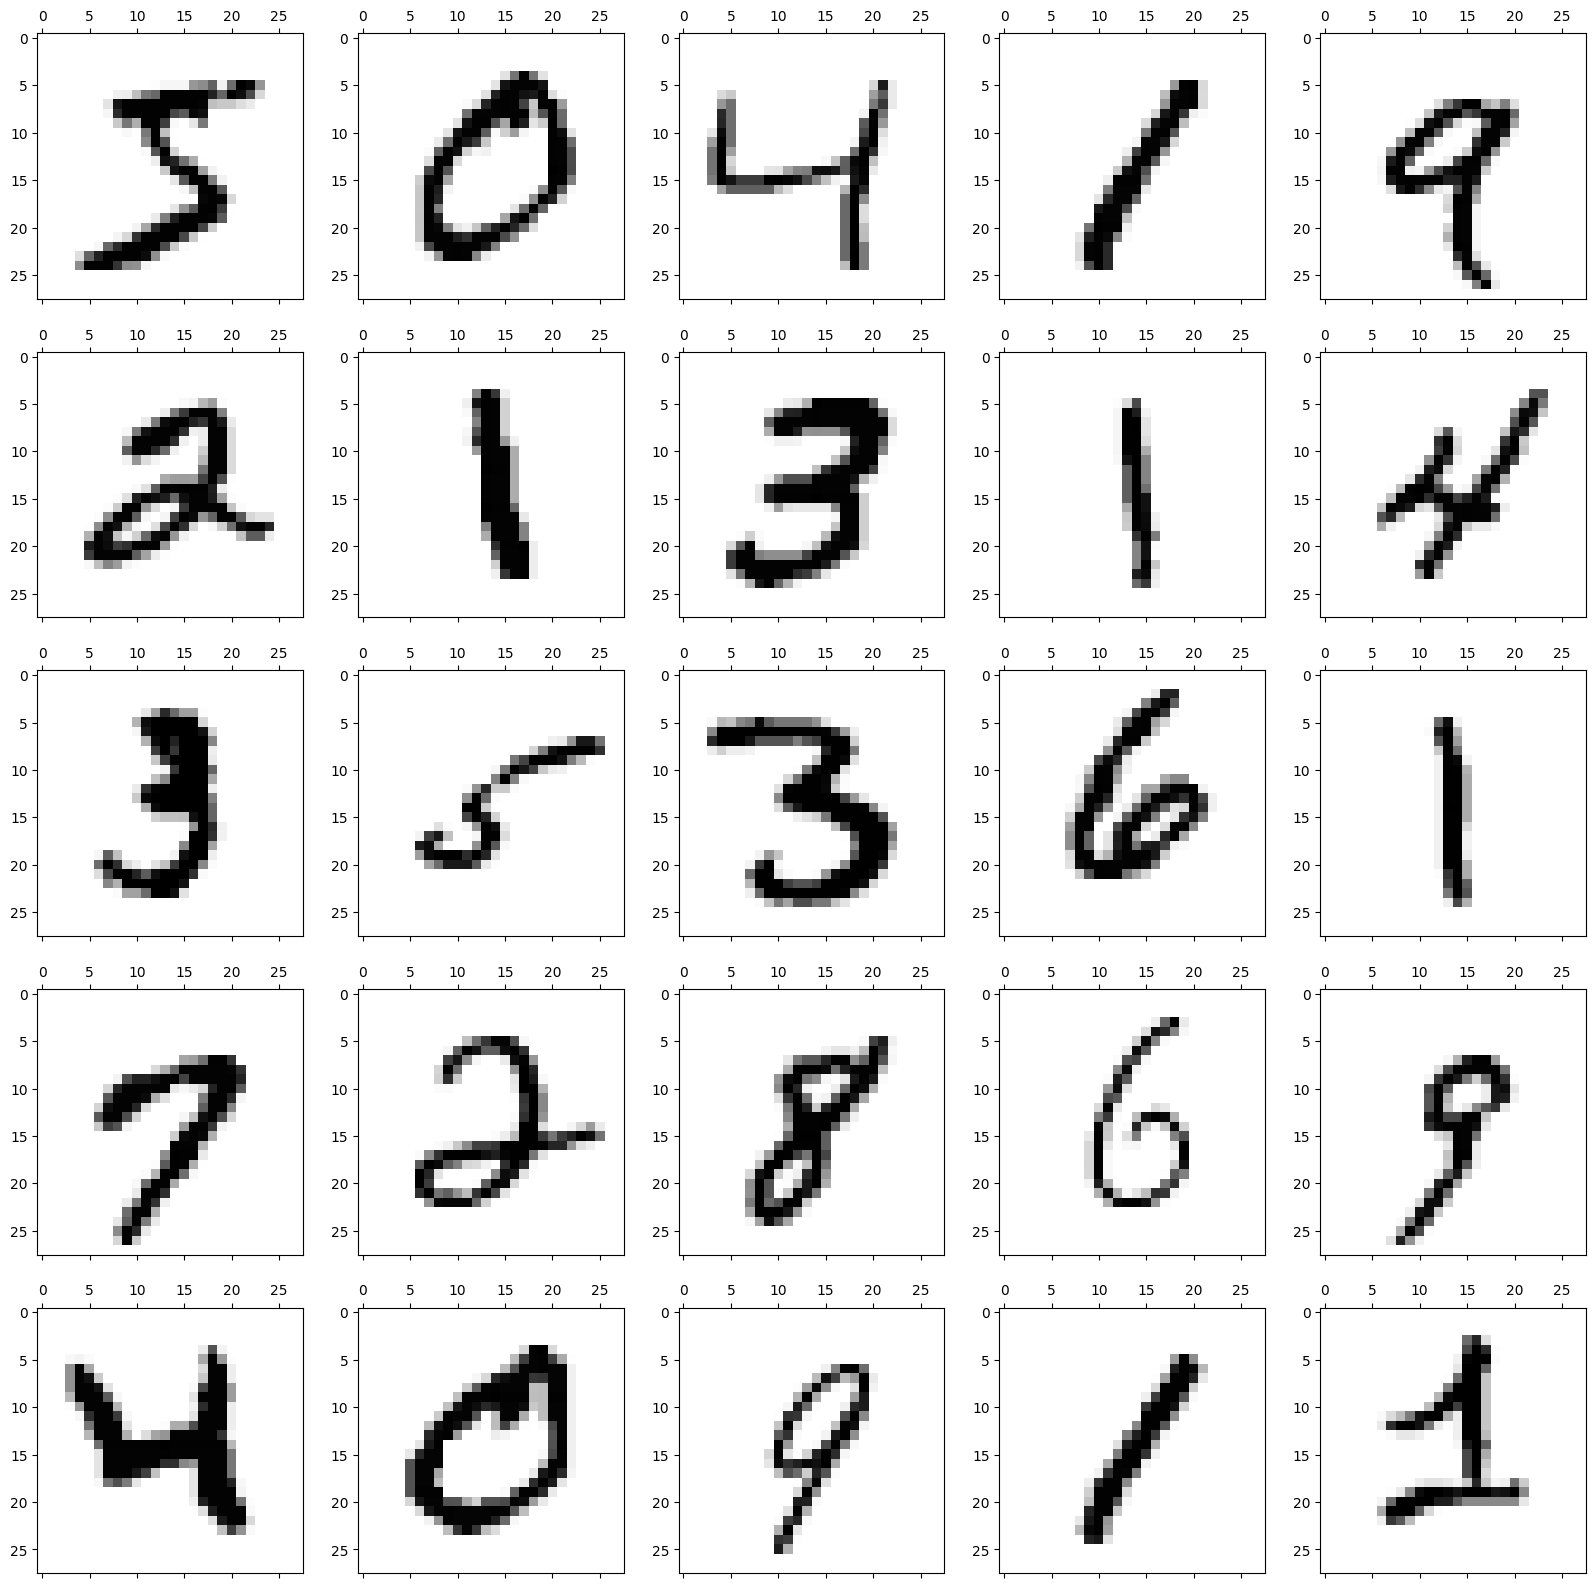

In [4]:
def plot_pc(ax, num, index):
    num_grid = num.reshape(28, -1)

    ax.matshow(num_grid, cmap='Greys')

grid_plot(X_train[0:5*5], 5, 5, plot_pc)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [16]:
print(pca.components_.shape)
print(pca.components_[0])

(154, 784)
[ 5.26572512e-20  1.38777878e-17  2.77555756e-16  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  2.77555756e-17  0.00000000e+00
  8.67361738e-19  0.00000000e+00  0.00000000e+00  1.35525272e-20
 -1.13022998e-06 -4.44987008e-06 -2.19785960e-06 -9.15774834e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.46332117e-07  8.70394526e-07  8.07828577e-06  2.07899216e-05
  2.74484784e-05  4.43302472e-05  7.14293297e-05  9.03571728e-05
  8.92534083e-05  7.96187541e-05  8.37900231e-05  6.12003373e-05
  3.32476102e-05  3.18856916e-05  1.84435794e-05 -1.33003534e-05
 -1.08540941e-05  1.55973516e-06  1.06839781e-06  5.04492279e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.96615753e-06  1.09264414e-06
  3.78170707e-

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

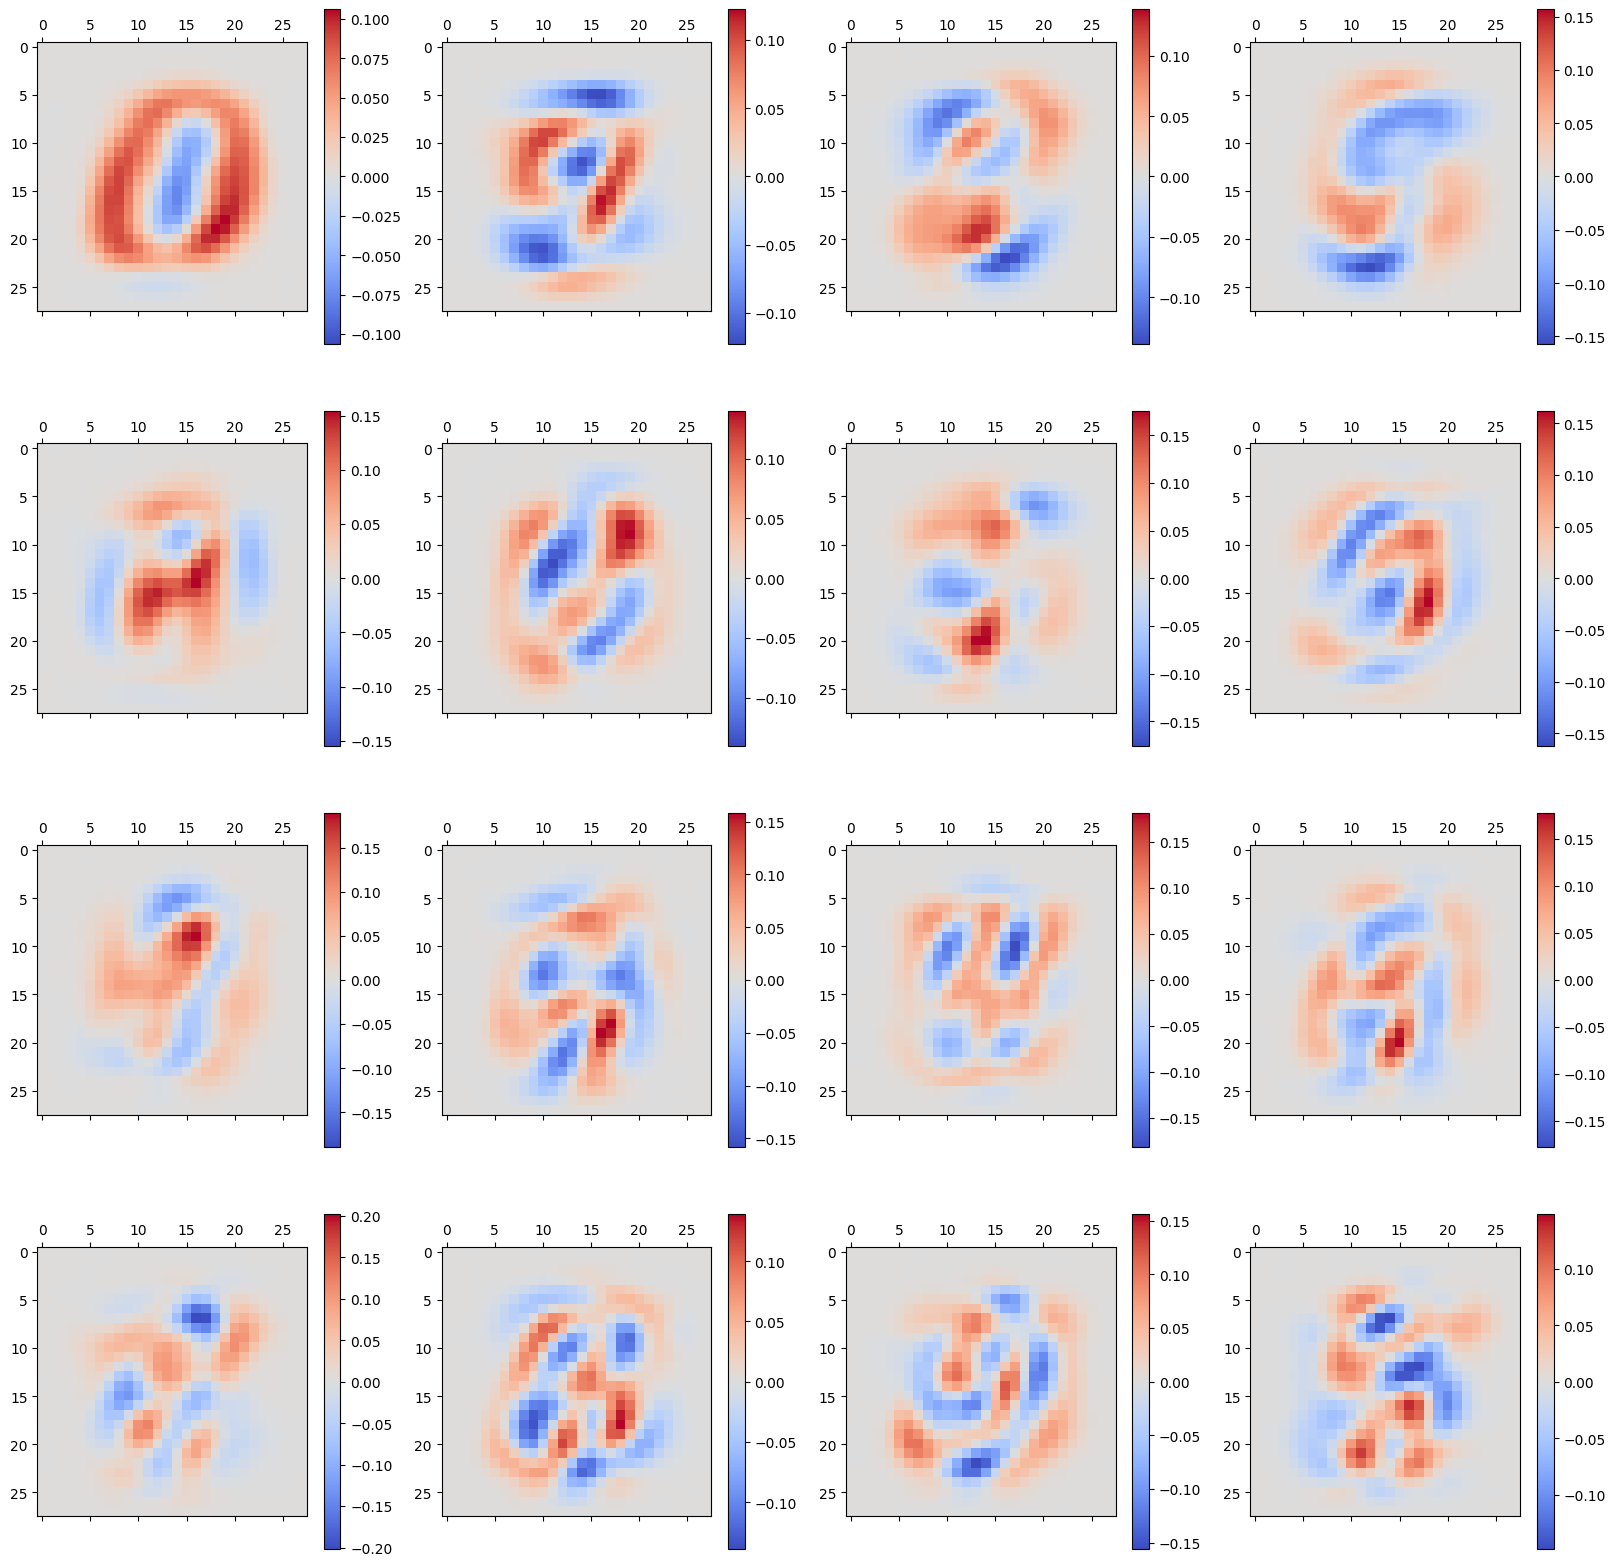

In [6]:
from matplotlib.colors import CenteredNorm

def plot_pc(ax, pc, index):
    pc_grid = pc.reshape(28, -1)

    axImg = ax.matshow(pc_grid, cmap='coolwarm', norm=CenteredNorm())
    plt.colorbar(axImg)

grid_plot(pca.components_[0:4*4], 4, 4, plot_pc)

In [7]:
X_train_pca, X_test_pca = pca.transform(X_train), pca.transform(X_test)

X_train_pca.shape

(60000, 154)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=504, n_jobs=16)
rcf.fit(X_train_pca, y_train)
rcf.score( X_train_pca, y_train), rcf.score(X_test_pca, y_test)

(0.98045, 0.9328)

In [9]:
pca2 = PCA(n_components=2)
X2 = pca2.fit_transform(mnist.data)
print(pca2.components_)
print(pca2.explained_variance_)
print(pca2.explained_variance_ratio_)

[[-2.59155037e-18  3.94252150e-18 -4.20152076e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.91733092e-17  4.51460997e-17 -3.02610361e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
[334294.06140901 245433.38898402]
[0.09746116 0.07155443]


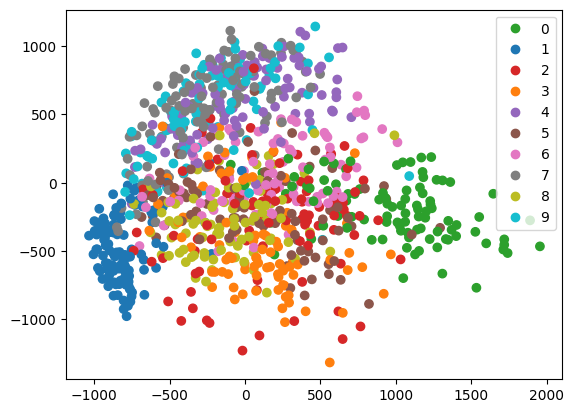

In [10]:
s = plt.scatter(X2[:1000,0], X2[:1000,1], c = mnist.target.astype('int')[:1000], cmap=ListedColormap(['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan']))
plt.legend(*s.legend_elements())

In [11]:
from sklearn.manifold import TSNE

X_small = X_train[:2000]

tsne = TSNE(n_components=2, n_jobs=16)
Xtsne = tsne.fit_transform(X_small)

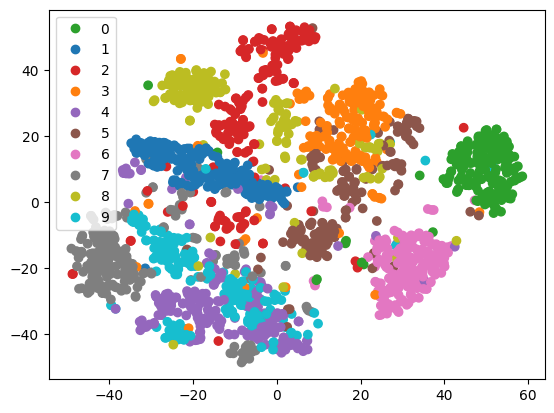

In [12]:
s = plt.scatter(Xtsne[:,0], Xtsne[:,1], c = mnist.target.astype('int')[:2000], cmap=ListedColormap(['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan']))
plt.legend(*s.legend_elements())

c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


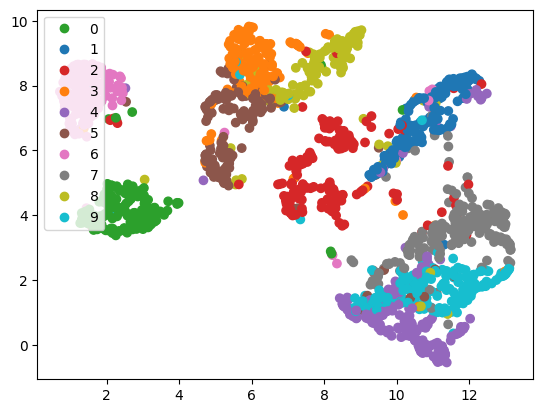

In [13]:
import umap

um = umap.UMAP(n_jobs=16)

embedding = um.fit_transform(X_small)

s = plt.scatter(embedding[:,0], embedding[:,1], c = mnist.target.astype('int')[:2000], cmap=ListedColormap(['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan']))
plt.legend(*s.legend_elements(), loc="upper left")